Import standard modules:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Import section specific modules:

In [3]:
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
import track_simulator

## 5.5 The Break Down of the Small Angle Approximation and the W-Term

Up to this point we used a resampling step and the Fast Fourier Transform to move between the image and measurement domains. Recall that we used the following simplified Fourier relationship to justify this synthesis process:
\begin{equation}
 \begin{split}
     V(u,v) &= \int_\text{sky}{I(l,m)e^{-2\pi i/\lambda(\vec{b}\dot(\vec{s}-\vec{s}_0))}}dS\\
            &= \int\int{I(l,m)e^{-2\pi i/\lambda(ul+vm+w(\sqrt{1-l^2-m^2}-1))}}\frac{dldm}{\sqrt{1-l^2-m^2}}\\
            &\approx\int\int{I(l,m)e^{-2\pi i/\lambda(ul+vm)}}dldm\\
 \end{split}
\end{equation}
The last approximation to the model is just a Fourier transform by definition and is the one used when we were imaging up to this point. However, the more accurate version model that relates the measurement to the brightness distribution along the celestial sphere is ***not*** the classical Fourier transform. The approximation is only valid when $n - 1 = \sqrt{1-l^2-m^2} - 1 \ll 1$ (ie. images over small regions of the sky) and / or $w \approx 0$. Here $(n-1)$ is the projection height difference between the planar approximation tangent to the celestial sphere and the point's true position on the sphere, see illustration below. Under the assumptions of a narrow field and coplanar measurements it is valid to use the FFT to construct a planar approximation to the sky. This section discusses the problem of *wide-field imaging using non-coplanar baselines*.

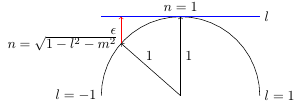

In [19]:
Image(filename="figures/orthogonal_projection_difference.png")

*Figure: The direction cosines (here $l$ is plotted against $n$) lie along the unit celestial sphere. $n$ is given by $n=\sqrt{1-l^2-m^2}$. If the projection pole (tangent point of the image) is at the same point as the phase reference centre, $n_0 = 1$. The total error between the orthogonal (SIN) projection of the source onto the tangent image plane and the source position on the celestial sphere is given as $\epsilon=(n-n_0)=(\sqrt{1-l^2-m^2} - 1)$.*

###5.5.1 Coplanar sampling

Consider the following two hypothetical arrays: a perfectly co-planar array that only has baselines along the east-west direction, and a second perfectly co-planar two-dimensional array with some baselines in a non-east-west direction.

In [7]:
NO_ANTENNA = 4
NO_BASELINES = NO_ANTENNA * (NO_ANTENNA - 1) / 2 + NO_ANTENNA
CENTRE_CHANNEL = 1e9 / 299792458 #Wavelength of 1 GHz
#Create a perfectly planar array with both a perfectly East-West baseline and 2 2D baselines
ENU_2d = np.array([[5,0,0],
                [-5,0,0],
                [10,0,0],
                [0,23,0]]);
ENU_ew = np.array([[5,0,0],
                 [-5,0,0],
                 [10,0,0],
                 [0,0,0]]);
ARRAY_LATITUDE = 30 #Equator->North
ARRAY_LONGITUDE = 0 #Greenwitch->East, prime -> local meridian

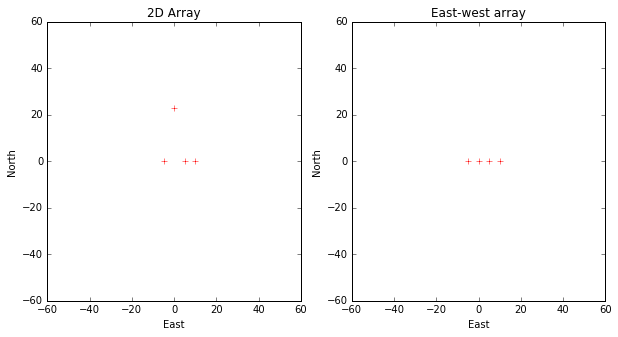

In [8]:
fig = plt.figure(figsize=(10, 5))
ax=fig.add_subplot(121)
ax.set_title("2D Array")
ax.plot(ENU_2d[:,0],ENU_2d[:,1],"r+")
ax.set_xlabel("East")
ax.set_ylabel("North")
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax=fig.add_subplot(122)
ax.set_title("East-west array")
ax.plot(ENU_ew[:,0],ENU_ew[:,1],"r+")
ax.set_xlabel("East")
ax.set_ylabel("North")
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
plt.show()

The two-dimensional interferometer have two major advantages over its one-dimensional east-west counterpart:
1. Improved u,v coverage at observation angles near the horizon, as plotted below.
2. Recall that the interferometer response is maximum when the phase-reference centre is orthogonal to the baseline. At lower observation angles it is desirable to have baseline components that are not aligned from east-to-west.

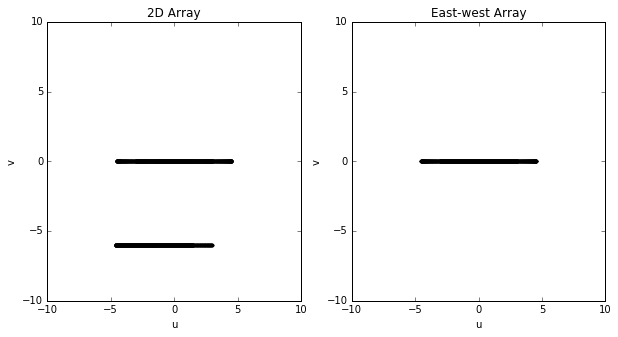

In [14]:
DECLINATION = 0
T_OBS = 12
T_INT = 1/60.0
uw_2hr_2d = track_simulator.sim_uv(0.0,DECLINATION,T_OBS,T_INT,ENU_2d,ARRAY_LATITUDE,False)/CENTRE_CHANNEL
uv_2hr_ew = track_simulator.sim_uv(0.0,DECLINATION,T_OBS,T_INT,ENU_ew,ARRAY_LATITUDE,False)/CENTRE_CHANNEL
fig = plt.figure(figsize=(10, 5))
ax=fig.add_subplot(121)
ax.set_title("2D Array")
ax.plot(uw_2hr_2d[:,0],uw_2hr_2d[:,1],'k.')
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax=fig.add_subplot(122)
ax.set_title("East-west Array")
ax.plot(uv_2hr_ew[:,0],uv_2hr_ew[:,1],'k.')
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
plt.show()

The one drawback to using these two-dimensional layouts is that the measurements taken over the duration of the observation do not remain co-planar, even though the array layout is perfectly flat. The uvw tracks and their projections are plotted in 3-space below to illustrate this. This is opposed to the tracks created by the east-west interferometer which all remain in the same plane parallel to the equator.

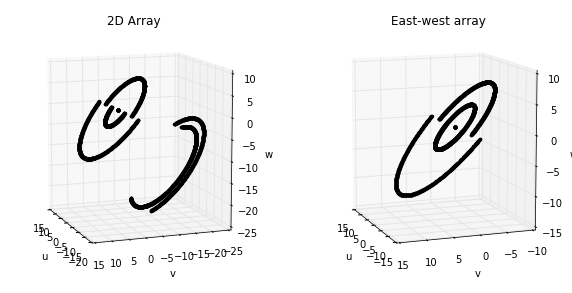

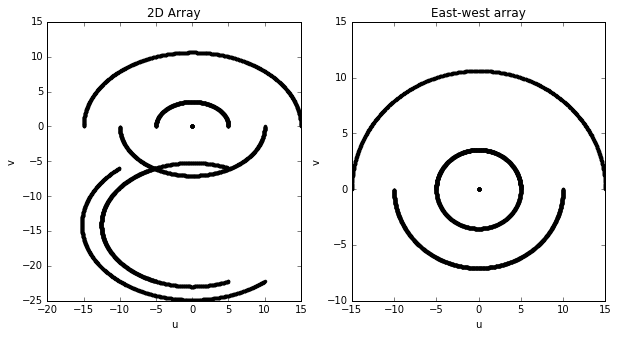

In [185]:
DECLINATION = 45
T_INT = 1/60.0
T_OBS = 12
uvw_2d = track_simulator.sim_uv(0.0,DECLINATION,T_OBS,T_INT,ENU_2d,ARRAY_LATITUDE,False)/CENTRE_CHANNEL
uvw_ew = track_simulator.sim_uv(0.0,DECLINATION,T_OBS,T_INT,ENU_ew,ARRAY_LATITUDE,False)/CENTRE_CHANNEL
fig=plt.figure(figsize=(10, 5))
ax=fig.add_subplot(121,projection='3d')
ax.set_title("2D Array")
ax.view_init(elev=10, azim=160)
ax.plot(uvw_2d[:,0],uvw_2d[:,1],uvw_2d[:,2],'k.')
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_zlabel("w")
ax=fig.add_subplot(122,projection='3d')
ax.set_title("East-west array")
ax.view_init(elev=10, azim=160)
ax.plot(uvw_ew[:,0],uvw_ew[:,1],uvw_ew[:,2],'k.')
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_zlabel("w")
plt.show()

fig = plt.figure(figsize=(10, 5))
ax=fig.add_subplot(121)
ax.set_title("2D Array")
ax.plot(uvw_2d[:,0],uvw_2d[:,1],'k.')
ax.set_xlabel("u")
ax.set_ylabel("v")
ax=fig.add_subplot(122)
ax.set_title("East-west array")
ax.plot(uvw_ew[:,0],uvw_ew[:,1],'k.')
ax.set_xlabel("u")
ax.set_ylabel("v")
plt.show()

When the measurement domain is sampled along a single plane, as is true for the east-west interferometer, then all w can be written as the same linear combination of u and v: $w = \alpha{u}+\beta{v}$. Although this introduces a slight distortion of the u,v coordinates in the Fourier relationship between the sky and the measurements, the distorted relationship remains a valid two-dimensional Fourier transform. It can be stated as:
\begin{equation}
    \begin{split}
        V(u,v,w) &= \int\int{I(l,m)e^{-2\pi i/\lambda(ul' + vm')}\frac{dldm}{\sqrt{1-l^2-m^2}}}\\
        l' &= l + \alpha(\sqrt{1-l^2-m^2} - 1)\\
        m' &= m + \beta(\sqrt{1-l^2-m^2} - 1)\\
    \end{split}
\end{equation}

### 5.5.2 Non-coplanar sampling

The same cannot be said for two-dimensional arrays. There is no fixed relationship between w and u,v. Instead the relationship depends both on the time-variant zenethal and paralactic angles, and the u,v coverage only remains co-planar for instantaneous observations, provided the array layout is perfectly planar.

Neglecting the $w(n-1)$ term by synthesizing wide-field images with two-dimensional arrays, using a simple planar approximation, introduces an direction-dependent error in the measurement. This phase error depends on the height-difference between antennae, as is illustrated by the tilted interferometer below. 

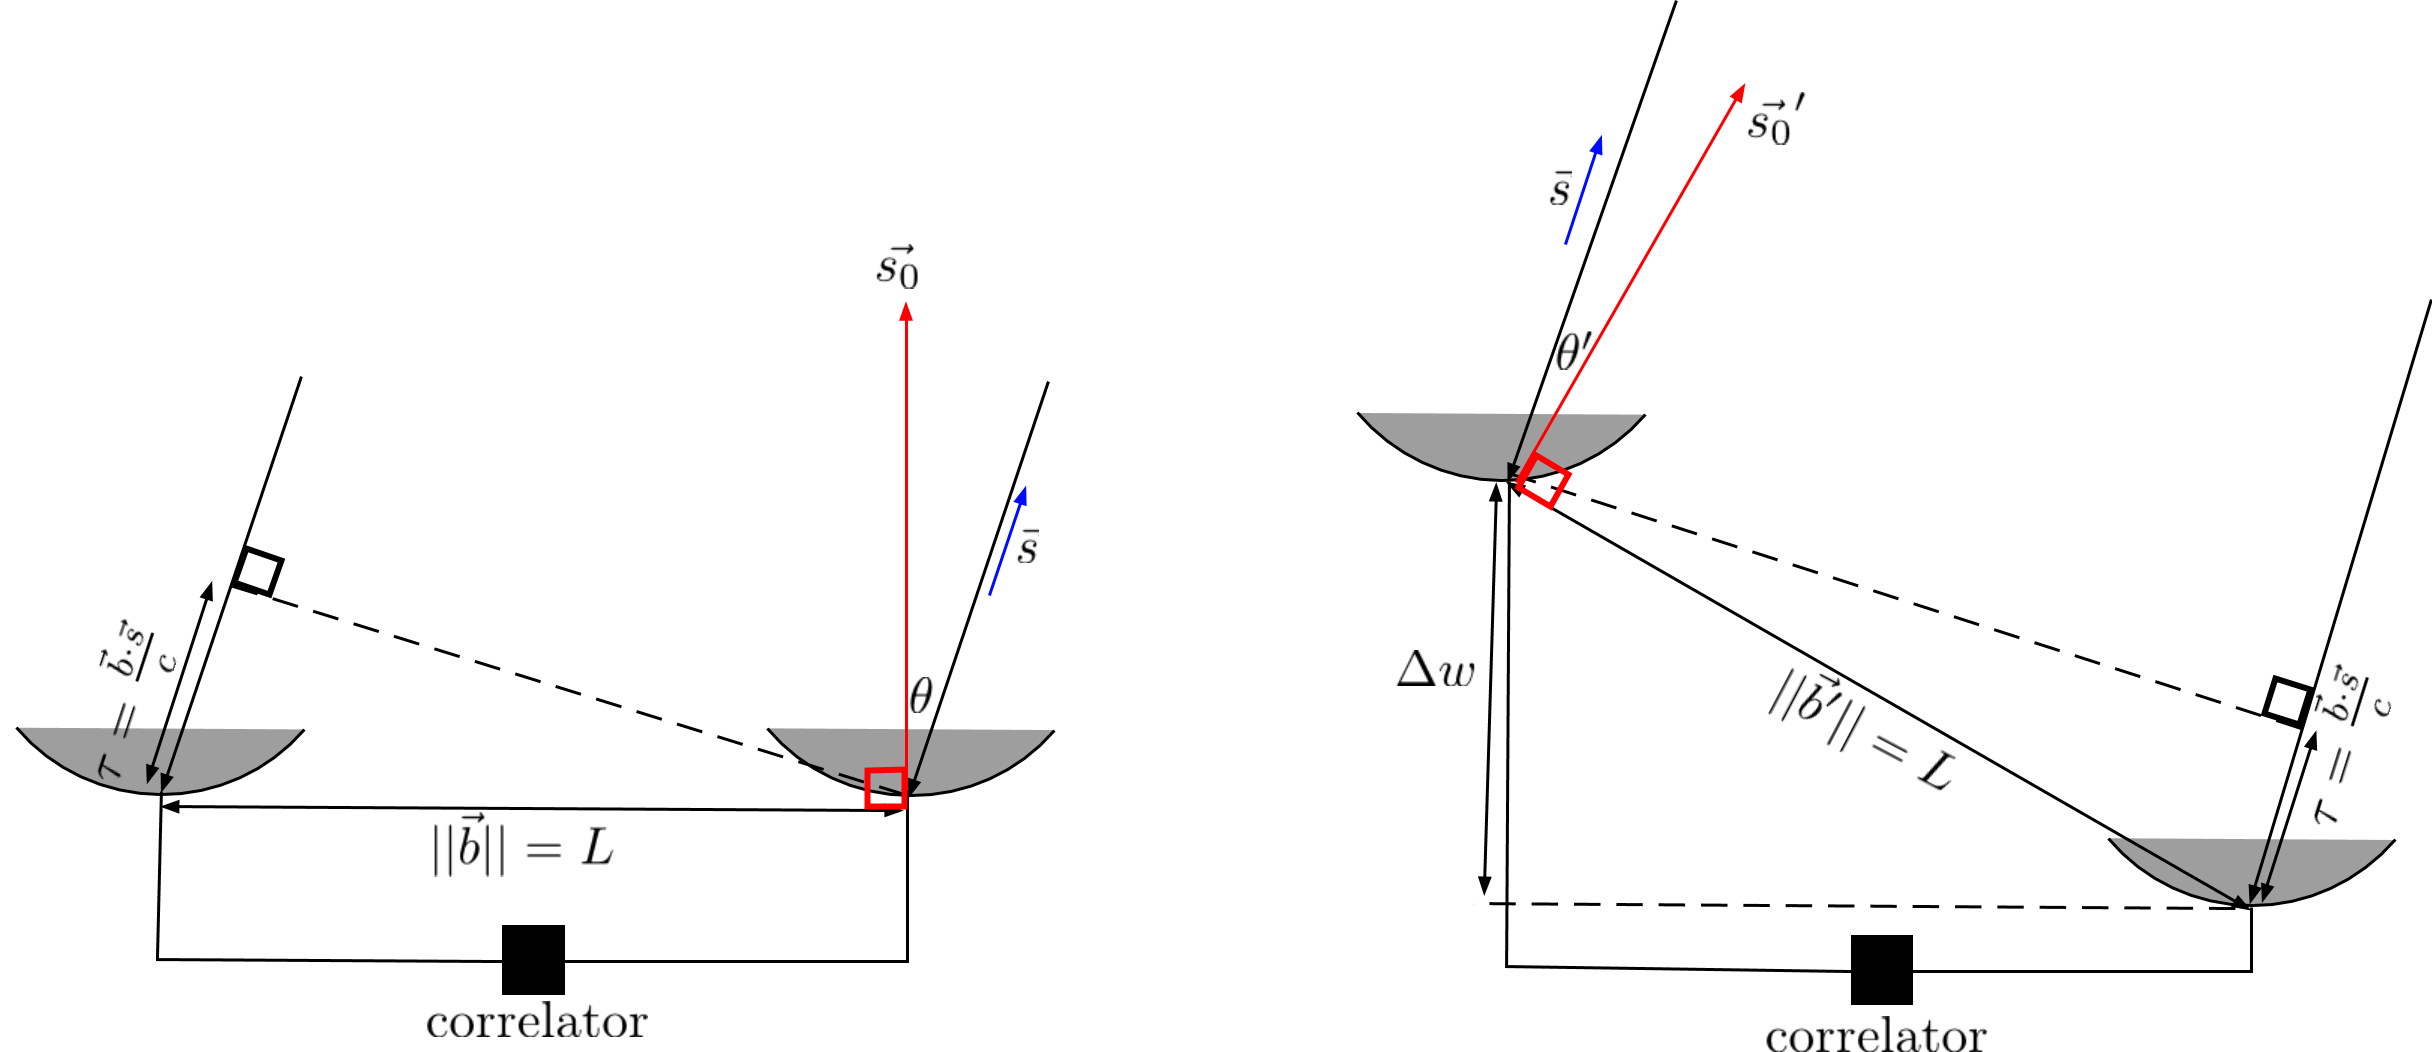

In [16]:
Image(filename="figures/tilted_interferometer.png")

*Figure: As the two figures show the projection of the source vector onto the two baselines are different for the coplanar and tilted interferometers. The phase for signals taken by co-planar interferometer baselines along some line of sight, $\vec{s}$, is given as $\phi = -2\pi i/\lambda(ul + vm)$, as opposed to tilted baselines that measure this same phase as $\phi_\text{tilt} = -2\pi i/\lambda{[ul + vm + w(n-1)]}$. The signal propagation delay is worse on the longest baselines and along the direction of sources far away from the phase centre of the interferometer.*

It is important to realize that this phase term is purely geometric in origin, and isn't a signal delay that can be corrected for at the correlator level; inserting a delay to correct $\Delta{w}$ for non-coplanar measurements only serves to correct the error in a single line of sight. In other words only the phase centre of the interferometer is changed by such a correction.

The small angle approximation $\sqrt{1+x} \approx 1+x/2$ gives some intuition on how this phase error effects the brightness of sources away from the phase centre. It can be shown that:
\begin{equation}
    V(u,v,w) \approx {\int\int{I(l,m)(e^{2\pi i/\lambda wl^2/2}e^{2\pi i /\lambda wm^2/2})e^{-2\pi i /\lambda(ul+vm)}\frac{dldm}{n}}}
\end{equation}

Since w can be rewritten as a complex relationship of u,v and time-variant elevation and azimuth angles we expect to see a time- and baseline-variant shift in source position. This relative position shift also grows roughly quadratically with the source offsets in l and m. The images below show how sources are smeared over large areas during long observations.

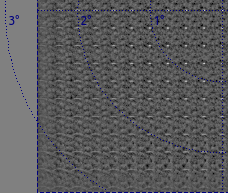

In [44]:
Image(filename="figures/widefield_meerkat.png")

*Figure: Distortions introduced on sources away from the projection pole when discarding the w term during inversion with the 2D Fast Fourier Transform.*

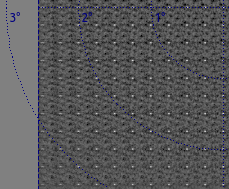

In [43]:
Image(filename="figures/widefield_corrected_meerkat.png")

*Figure: The phase-corrected image using the w-projection technique*

###5.3.3 Correcting the non-coplanar baselines effect


There are various ways the delay error introduced when discarding the $w(n-1)$ term during resampling and 2D Fast Fourier Transform can be corrected for:
1. Full 3D transform: Similar to the 2D Direct Fourier Transform the Fourier transform can be computed for every
   element in a cube of $l,m,n$ values. The sky lies along the unit sphere within this cube.
2. Snapshot imaging: As aluded to earlier the measurements taken during very short observations are co-planar, assuming
   the physical array lies on a flat plane. During each observation the $l,m$ coordnates are slightly distorted and the
   images have to be interpolated to the same coordinates before the images can be averaged into a single map of the sky.
3. Facet imaging: In facet imaging the goal is to drive the $(n-1)$ factor down to 0; satisfying the narrow-field
   assumption that makes the 2D Fourier inversion valid. There are a few ways in which the sky can be split into
   smaller images, but the classical faceting approach is to tile the celestial sphere with many small tangent images,
   approximating the sky by a polyhedron. 
   
   The sky is recentred at the image centres $l_i,m_i$ of each of the
   narrow-field facets, by phase shifting the measured visibilities. Each of the facet-images is then also rotated to be
   tangent to the sky sphere; as the Fourier transform preserves rotations, the facets can be tilted by rotating the u,v
   coordinates of the measurements to the tracks that would have been produced if the interferometer was pointing at
   $\alpha_i,\delta_i$ instead of the original phase tracking centre. The number of facets roughly needed to satisfy the
   sampling criterion is given as:
   \begin{equation}
       N_\text{facets} = \frac{2L\lambda}{{\xi}D^2}, \xi\ll{1}
   \end{equation}
   $L$ is the magnitude of the longest baseline and $D$ is the diametre of the antenna apertures. $\xi$ is a quality
   factor that specifies the furthest seperation allowed for the facet images from the celestial sphere.
4. W-projection: W-projection eliminates $w$ from the phase term by relating all non-coplanar measurements to
   measurements taken at $w=0$. Employing the convolution theorem the following relationship between $V(u,v,w)$ and
   $V(u,v,0)$ can be obtained:
   
   \begin{equation}
       \begin{split}
           V &= \int\int{I(l,m)e^{-2\pi i[ul+vm]}e^{-2\pi i[w(n-1)]}\frac{dldm}{n}}\\
           V &= \int\int{I(l,m)e^{-2\pi i[ul+vm]}\mathcal{w}_w(l,m)\frac{dldm}{n}}\\
           V(u,v,w) &= V(u,v,w=0)\circ\mathcal{W}_w(u,v)\\
       \end{split}
   \end{equation}
   This says that any measurement can be related to the the same $u,v$ plane during the resampling step by picking
   the the relevant $w$-dependent filter from a stack of precomputed filters. Normally these w-filters are combined with
   anti-aliasing filter as in the narrow-field imaging approach.
   
   The support size of these $\mathcal{W}_w$ filters are dependent on the size of the image and given by the following
   relation:
   \begin{equation}
       W_\text{sup} = \frac{{4\pi} w_\text{max}/{\lambda}D_\text{im}^2}{\sqrt{2-D_\text{im}^2}}
   \end{equation}
   Here $D_\text{im}$ is the diametre of the image and means that the computational complexity of the method depends on
   the size of the image.
   
   The alternative image-domain approach (called "w-stacking") multiplies the w-dependent phase directly into the image:
    1. During the resampling step the visibilties are gridded onto multiple grids (one per discretized value of w).
    2. Each of these layers are Fourier inverted
    3. The images are element-wise multiplied by $\mathcal{w}_w(l,m)$
    4. The stack of images are averaged into a single image.
    
   The number of discretized w-filters (w-projection) or image layers (w-stacking) are given by:
   \begin{equation}
        N_\text{planes} = \frac{2\pi w_\text{max}(n_\text{edge}-1)}{\lambda_\text{min}\xi}
   \end{equation}